In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Introduction to Matplotlib

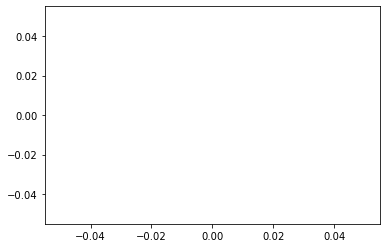

In [5]:
# Create a plot/figure
plt.plot(); # use ; to get rid of blank [] Jupyter Notebook output

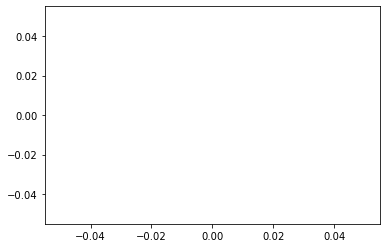

In [6]:
# Another way to get rid of blank [] output
plt.plot()
plt.show() 

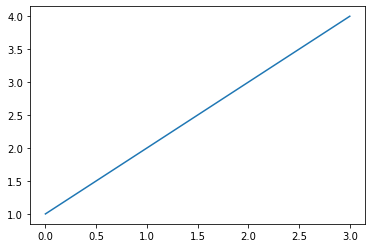

In [9]:
plt.plot([1, 2 ,3, 4]);

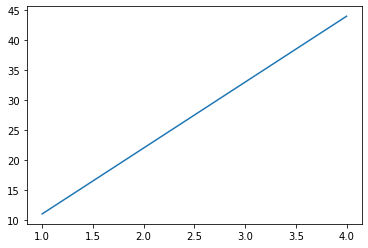

In [10]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x,y);

## Multiple Ways to Create Figures

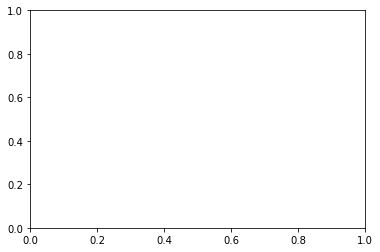

In [13]:
# 1st method
fig = plt.figure() # create a figure
ax = fig.add_subplot() # adds some axes
plt.show()

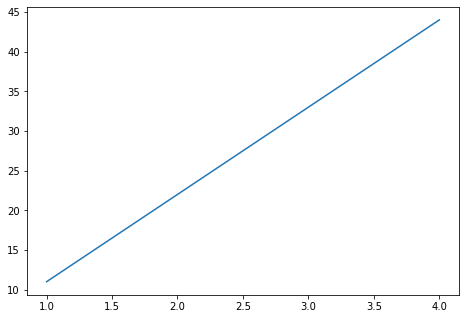

In [14]:
# 2nd method
fig = plt.figure() # create a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show()

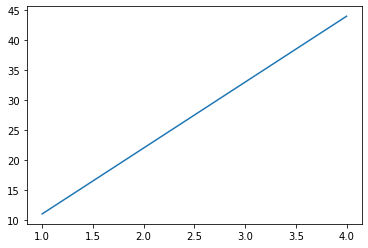

In [16]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x,y);

## Anatomy of a Matplotlib Figure
The matplotlib docs recommend using the object-oriented interfaces. Here's a guide with code examples showing how to create all the different pieces:

![](../images/anatomy-of-matplotlib-figure.png)

## Matplotlib example workflow

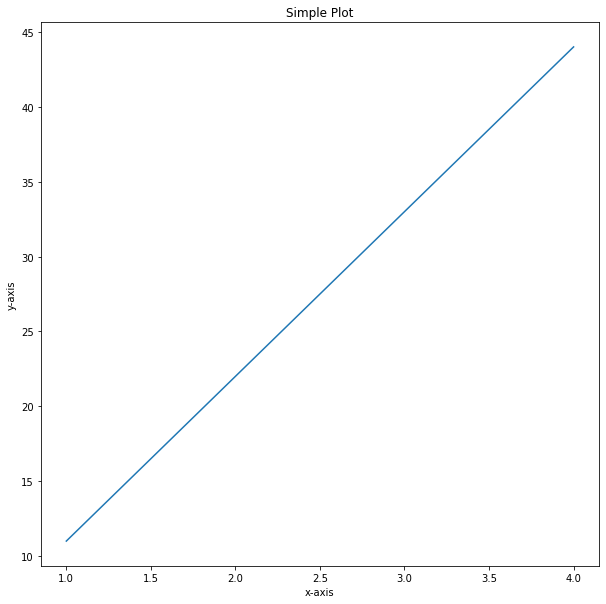

In [17]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10)) # figsize=(width, height)

# 3. Plot data
ax.plot(x,y)

# 4. Customize plot
ax.set(title="Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. Save & show (you save the figure)
fig.savefig("../images/sample-plot.png")

## Making Figures with NumPy ndarrays
Making:
- Line Plot (default)
- Scatter Plot
- Bar Plot
- Histogram
- Subplots

In [19]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

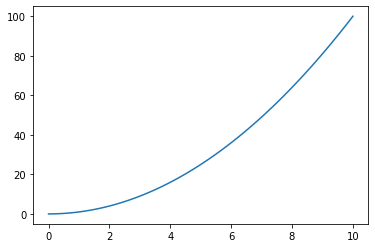

In [20]:
# Plot the data (default line plot)
fig, ax = plt.subplots()
ax.plot(x, x**2);

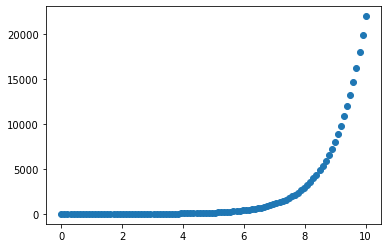

In [21]:
# Use the same data to make a scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

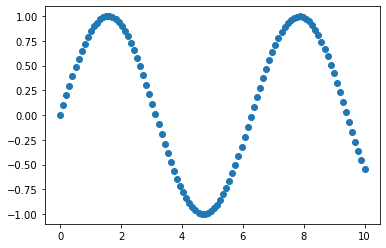

In [22]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

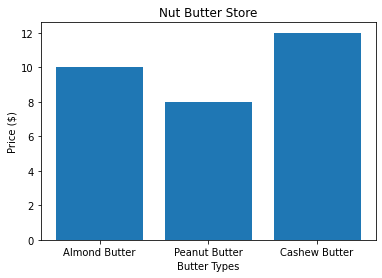

In [25]:
# Make a bar plot from a dictionary
nut_butter_prices = {"Almond Butter": 10, "Peanut Butter": 8, "Cashew Butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values()) # bar(x, y)
ax.set(title="Nut Butter Store", xlabel="Butter Types", ylabel="Price ($)");

<BarContainer object of 3 artists>

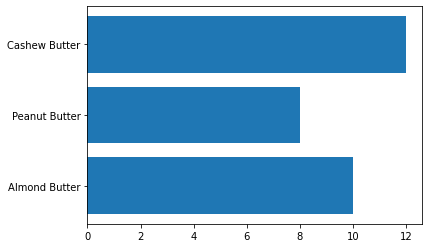

In [27]:
# Horizontal bar chart with barh()
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()))

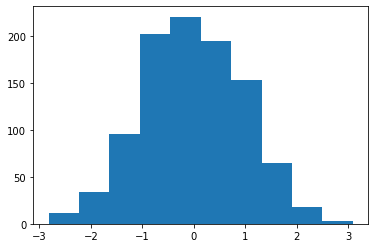

In [28]:
# Make some data for histograms
x = np.random.randn(1000) # randn gives values from a normal distribution
fig, ax = plt.subplots()
ax.hist(x); # histogram with hist()

### Two Options for Subplots

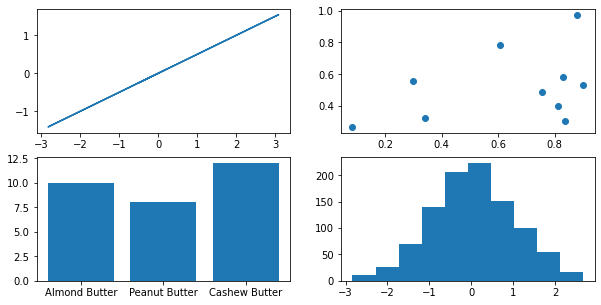

In [33]:
# Subplot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

# Plot to each different axis
ax1.plot(x, x/2)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

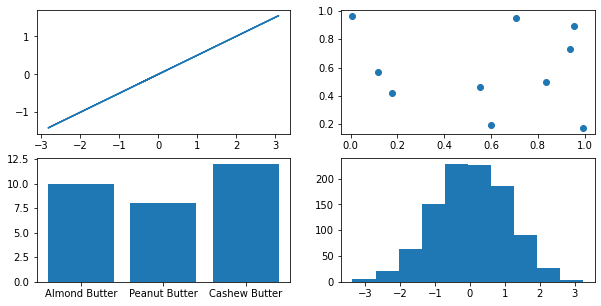

In [35]:
# Subplot option 2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

# Plot to each different index
ax[0,0].plot(x, x/2);
ax[0,1].scatter(np.random.random(10), np.random.random(10));
ax[1,0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1,1].hist(np.random.randn(1000));

## Plotting from Pandas DataFrames